In [1]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
from gradcam import VizGradCAM

In [2]:
# IMG_SIZE = (28, 28)
# IMG_SIZE = (56, 56)
IMG_SIZE = (224, 224)

In [3]:
folder = 'img'
files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

In [4]:
def check_reverse(img):
    dark = light = 0
    for x in np.nditer(img):
        if x < 127: dark += 1
        else: light += 1
    if dark > light: return True
    else: return False

In [5]:
# model = load_model('es_func_exp.h5')
# model = load_model('es_func_folder_x3.h5')
# model = load_model('es_func_folder_56x3.h5')
model = load_model('es_func_folder_224x3_c.h5')

In [6]:
def predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 19, 10)  # only this 100%
    img = Image.fromarray(img)
    img = img.resize((28,28), Image.ANTIALIAS)  # make same, like img_std/
    img = img.resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    img = np.array(img)/255
    # img = np.array(img)  # for es_func_exp.h5    
    pred = model.predict(np.expand_dims(img, axis=0))  #  1,x,x,3
    return np.argmax(pred)

In [7]:
count = 0
for i in range(0, len(files)):
    if int(files[i][0]) == predict(os.path.join(folder, files[i])):
        count += 1
    else: 
        dig = files[i]
        print(dig)
        plt.imshow(cv2.imread(os.path.join(folder,dig)))
        plt.show()

In [8]:
print (count / len(files) * 100, '%')

100.0 %


In [9]:
files.sort()

In [10]:
for f in files:
    print(f, predict(os.path.join(folder, f)), sep='  ')

0.png  0
0i.png  0
0zero.png  0
1.png  1
1i.png  1
1one.png  1
1oneone.png  1
2.png  2
2i.png  2
2two.png  2
3.png  3
3i.png  3
3three.png  3
4.png  4
4four.png  4
4i.png  4
5.png  5
5b.png  5
5five.png  5
5i.png  5
5w.png  5
6.png  6
6i.png  6
6six.png  6
7.png  7
77.png  7
7i.png  7
7seven.png  7
8.png  8
8eight.png  8
8i.png  8
9.png  9
9i.png  9
9nine.png  9
9w.png  9


0


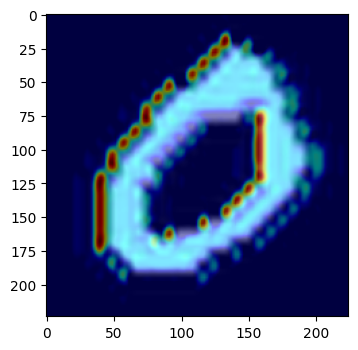

0


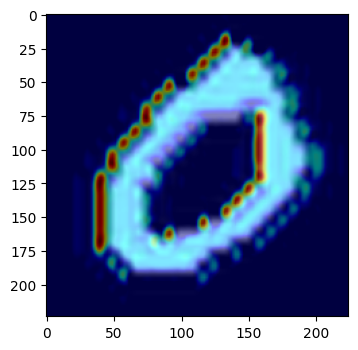

0


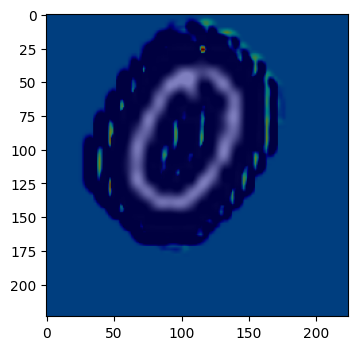

1


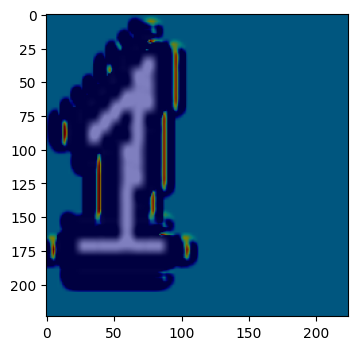

1


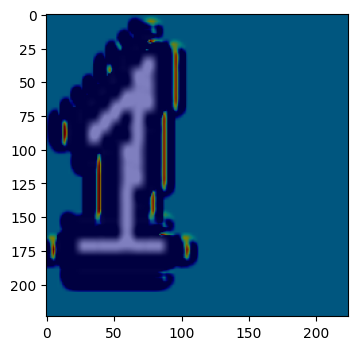

1


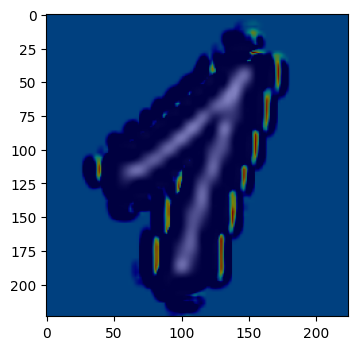

1


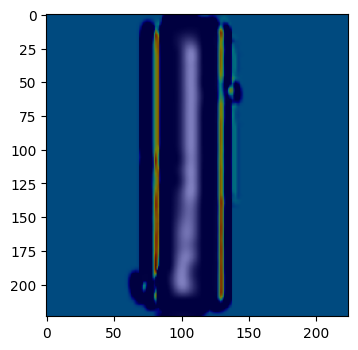

2


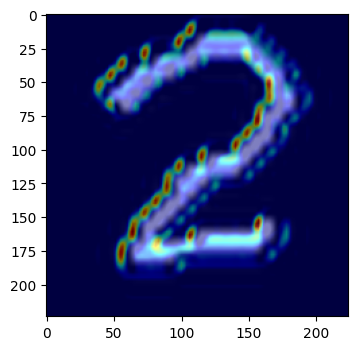

2


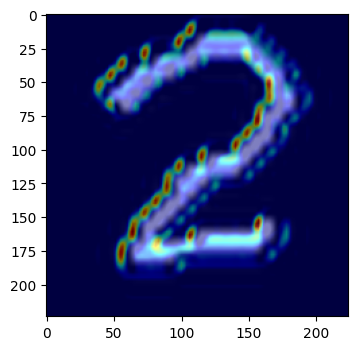

2


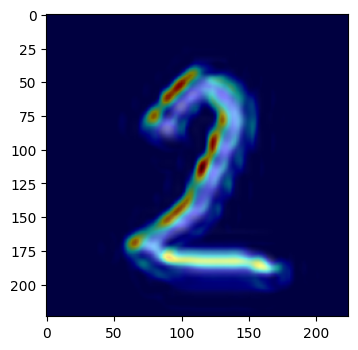

3


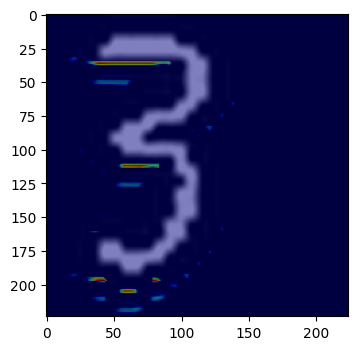

3


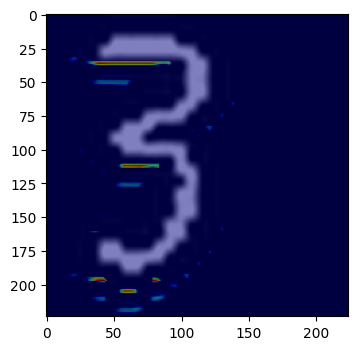

3


4


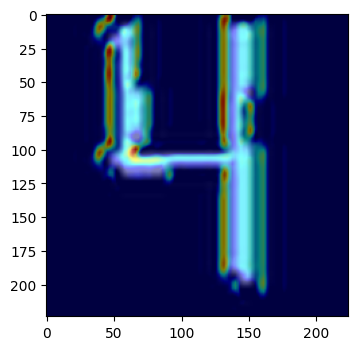

4


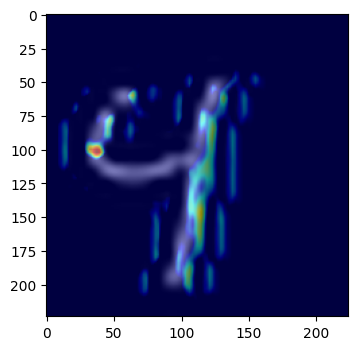

4


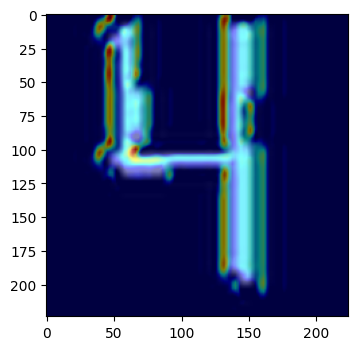

5


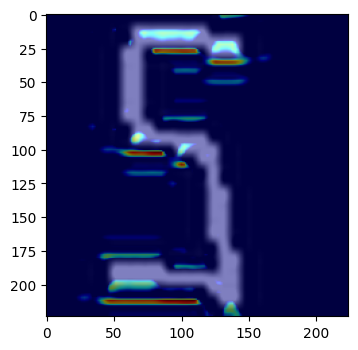

5


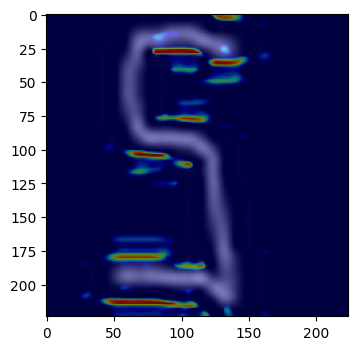

5


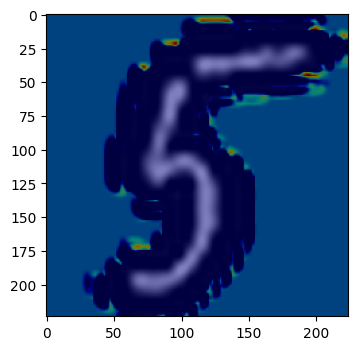

5


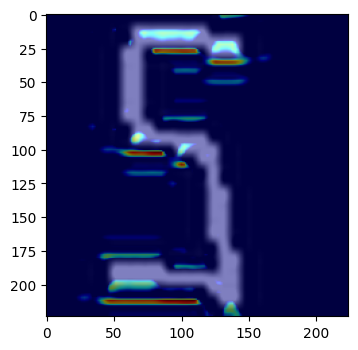

5


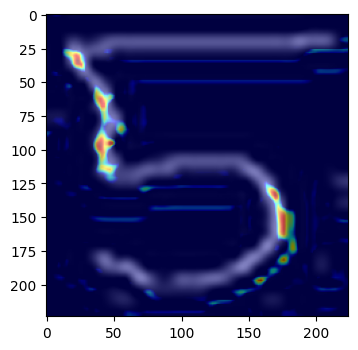

6


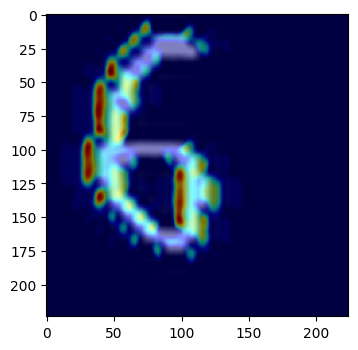

6


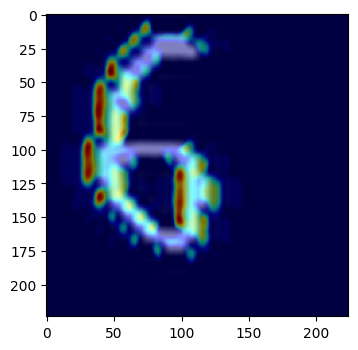

6


7


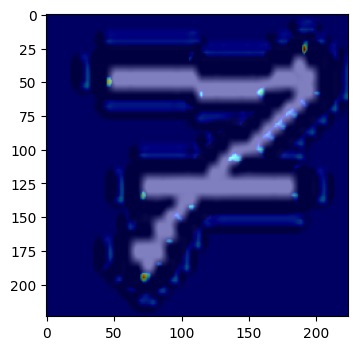

7


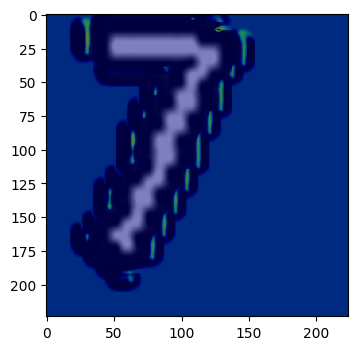

7


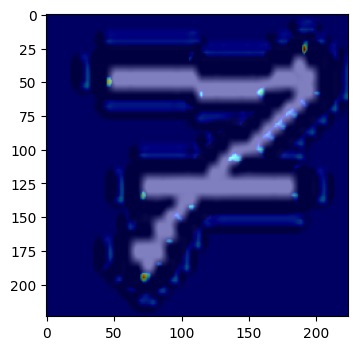

7


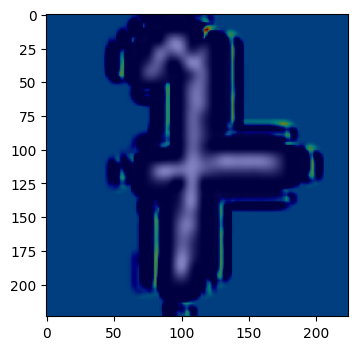

8


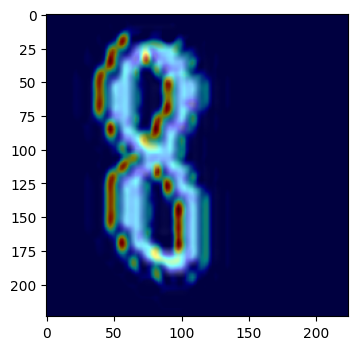

8


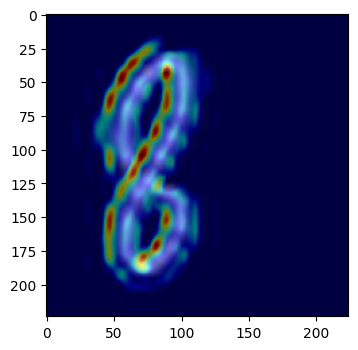

8


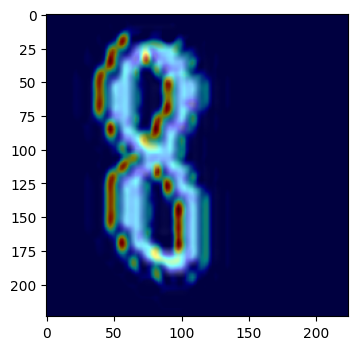

9


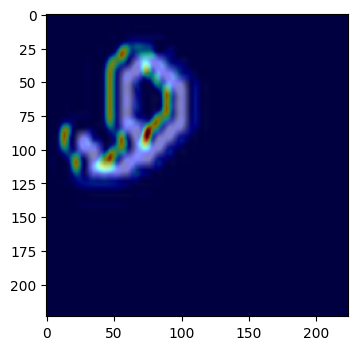

9


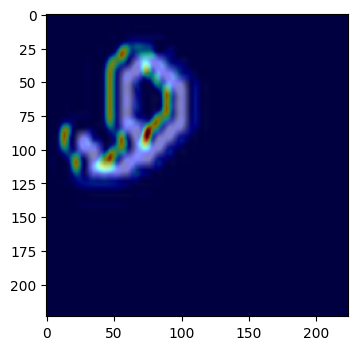

9


9


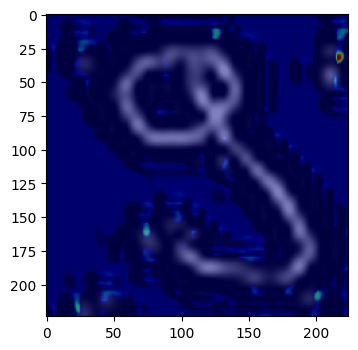

In [11]:
for f in files:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 19, 10)  # only this 100%
    img = Image.fromarray(img)
    img = img.resize((28,28), Image.ANTIALIAS)  # make same, like img_std/
    img = img.resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    im = np.array(img)/255
    # im = np.array(img)  # for es_func_exp.h5
    VizGradCAM(
        model,
        im,
        # plot_results=False
        plot_results=True
    )
    plt.show()

0


0


0


1


1


1


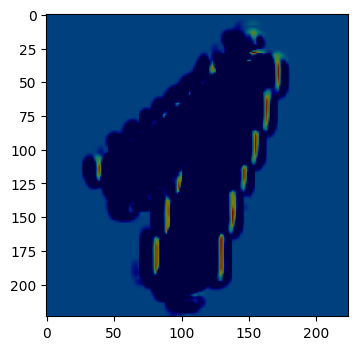

1


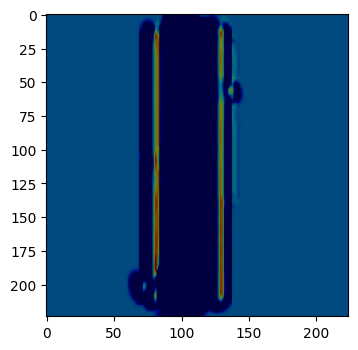

2


2


2


3


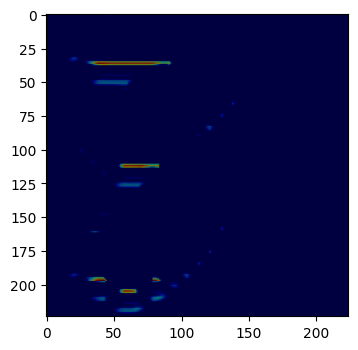

3


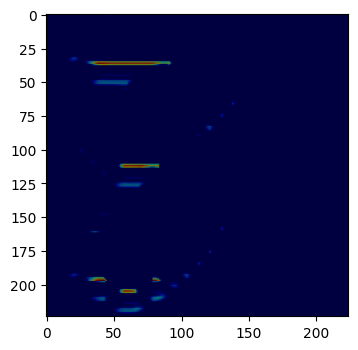

3


4


4


4


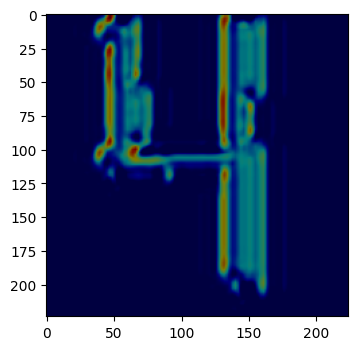

5


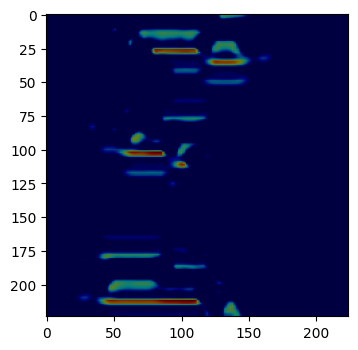

5


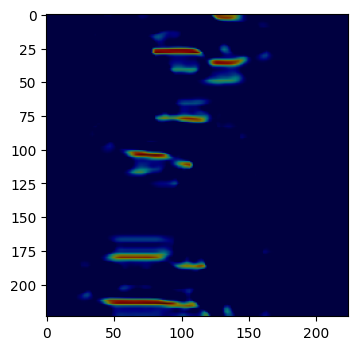

5


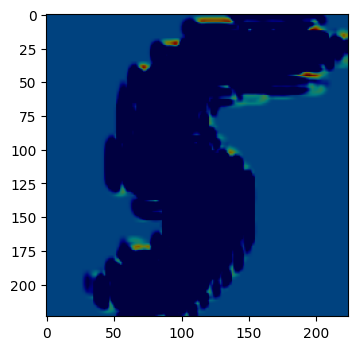

5


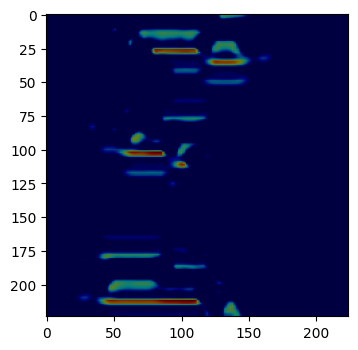

5


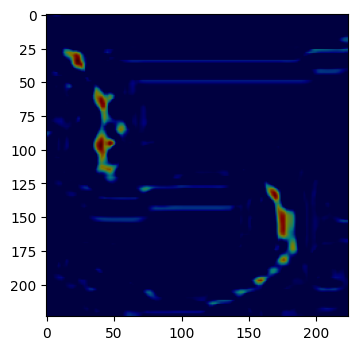

6


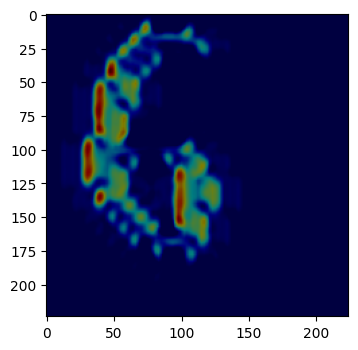

6


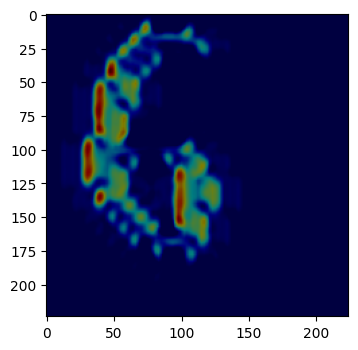

6


7


7


7


7


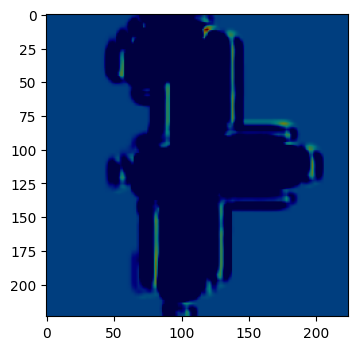

8


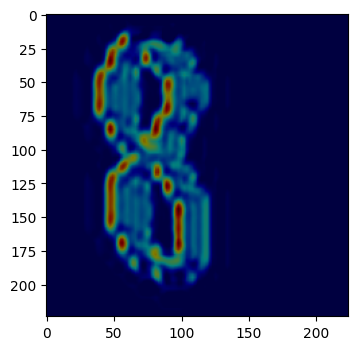

8


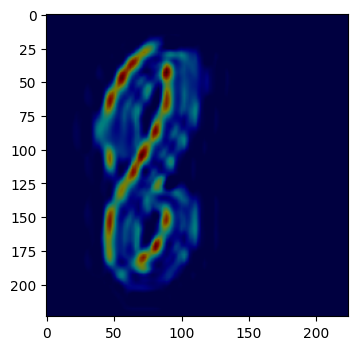

8


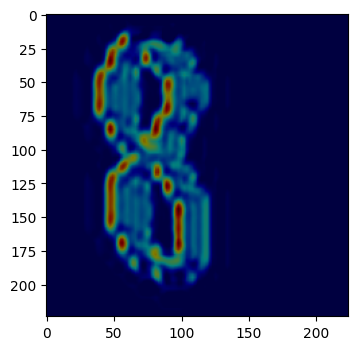

9


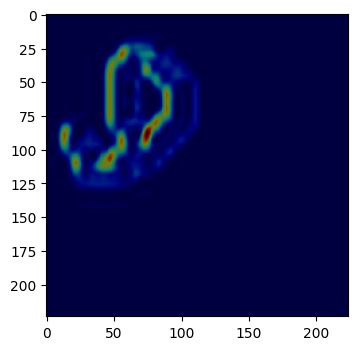

9


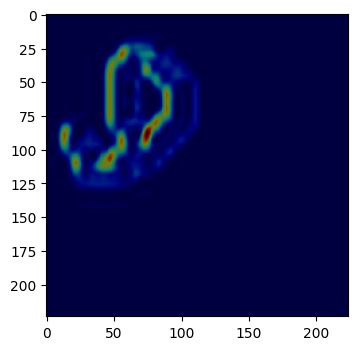

9


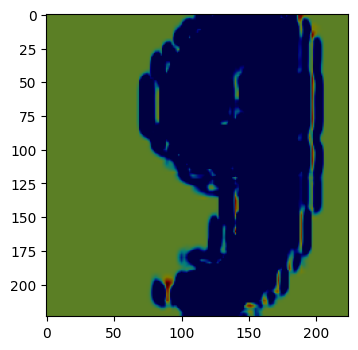

9


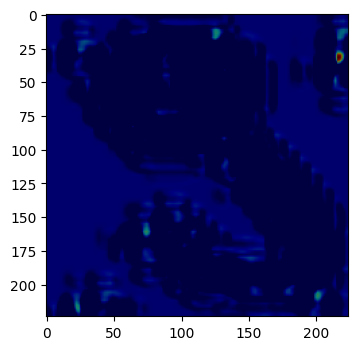

In [12]:
for f in files:
    img_path = os.path.join(folder, f)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
                                 19, 10)  # only this 100%
    img = Image.fromarray(img)
    img = img.resize((28,28), Image.ANTIALIAS)  # make same, like img_std/
    img = img.resize(IMG_SIZE, Image.ANTIALIAS).convert('RGB')
    im = np.array(img)/255
    # im = np.array(img)  # for es_func_exp.h5
    VizGradCAM(
        model,
        im,
        plot_results=False
        # plot_results=True
    )
    plt.show()